### 📖Frequency analysis of time series: key properties of Fourier analysis

This notebook provides a comprehensive introduction to core concepts of frequency analysis using the Discrete Fourier Transform (DFT) and its computational implementation, the Fast Fourier Transform (FFT). We will cover:

1. Relationship between time-domain duration and frequency resolution  
2. Maximum frequency limit (Nyquist frequency)  
3. The leak effect  
4. Window functions  
5. Application of the Von-Hann (Hanning) window to a sea-level time series  
6. Further methods for frequency analysis   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 📖Relationship between duration and frequency resolution

The frequency resolution of the Fast Fourier Transform (FFT) is a crucial factor, as it determines how precisely one can identify frequency components within a dataset. The frequency resolution is inversely proportional to the duration of the time series. The frequency resolution (ΔFₜ) can be defined by the equation:

$\Delta F_t = \frac{f_{t}}{N} = \frac{1}{\Delta f_t N} = \frac{1}{T}$

Where:

- $\Delta F_t$: Period in the frequency domain
- $f_{t}$: Sampling frequency in the time domain
- $N$: Number of values in the time domain
- $\Delta f_t$: Period in the time domain
- $T$: Duration of the time series in the time domain

💡The frequency resolution depends only on the duration of the time series in the time domain, not on the sampling rate.

Folllowing example demonstrates how the length of a time series affects its frequency resolution using synthetic data.

In [2]:
# Create the first time series (5 days)
time = np.linspace(0, 5, 5*96, endpoint=True) # 5 days, 96 samples per day 
freq1 = 1
amp1 = 1
comp1 = amp1 * np.cos(time*2*np.pi*freq1)
freq2 = 0.5
amp2 = 3
comp2 = amp2 * np.cos(time*2*np.pi*freq2)
freq3 = 2
amp3 = 2
comp3 = amp3 * np.cos(time*2*np.pi*freq3)
comp_sum1 = comp1 + comp2 + comp3 # sum of the three components

In [6]:
# Create the second time series (10 days)
time = np.linspace(0, 10, 10*96, endpoint=True) # 10 days, 96 samples per day
freq1 = 1
amp1 = 1
comp1 = amp1 * np.cos(time*2*np.pi*freq1)
freq2 = 0.5
amp2 = 3
comp2 = amp2 * np.cos(time*2*np.pi*freq2)
freq3 = 2
amp3 = 2
comp3 = amp3 * np.cos(time*2*np.pi*freq3)
comp_sum2 = comp1 + comp2 + comp3 # sum of the three components

Now perform the FFT and compute the amplitude spectrum, The FFT is used to transform the time-domain signals into the frequency domain.

In [7]:
N = len(comp_sum1) 
T = 96
data_fft1 = np.fft.fft(comp_sum1)[0:int(N/2)] # FFT of the first time series
freqs1 = np.fft.fftfreq(N, d=1/T)[0:int(N/2)] # frequencies of the first time series
amplitude1 = (2/N)*np.abs(data_fft1) # amplitude of the first time series

In [8]:
N = len(comp_sum2)
T = 96
data_fft2 = np.fft.fft(comp_sum2)[0:int(N/2)] # FFT of the second time series
freqs2 = np.fft.fftfreq(N, d=1/T)[0:int(N/2)] # frequencies of the second time series
amplitude2 = (2/N)*np.abs(data_fft2)

Finally, compare the amplitude spectra of the two time series to observe the effect of time series length on frequency resolution.

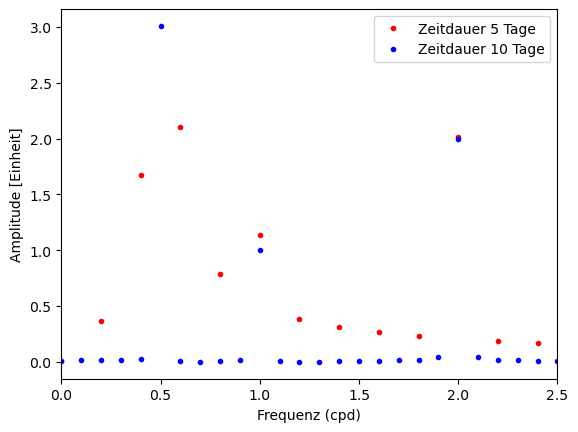

In [9]:
plt.plot(freqs1, amplitude1, 'r.', label='Zeitdauer 5 Tage')
plt.plot(freqs2, amplitude2, 'b.', label='Zeitdauer 10 Tage')

plt.xlabel('Frequenz (cpd)')
plt.ylabel('Amplitude [Einheit]')
plt.xlim(0,2.5)
plt.legend()

plt.show()

**Conclusion:** The longer the time series, the better the resolution of individual frequency components in the spectrum.

### 📖Maximum frequency limit

The upper limit of frequencies detectable by the FFT is determined by the sampling rate in the time domain. The upper limit of detectable frequencies is defined by the **Nyquist frequency**:

$F_{\text{Nyquist}} = \frac{f_t}{2}$

Where:
- $f_t$: Sampling frequency in the time domain

<img src="https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/fundamentals-of-big-spatial-data/-/raw/main/figures/nyquist.png?ref_type=heads" alt="alt text" width="1100" align="left"/>

*Source: [Wikipedia](https://de.wikipedia.org/wiki/Komplexe_Zahl)*

**🧠 Dive Deeper** For further details, see [Passing the Nyquist Limit by Jack Schaedler](https://jackschaedler.github.io/circles-sines-signals/sampling2.html)



💡To determine frequencies, the sampling rate in the time domain must be appropriately considered!

### 📖Spectral leakage

Spectral leakage happens when using the Discrete Fourier Transform (DFT) to analyze signals. The DFT assumes that the signal repeats infinitely, so it expects the frequencies in the signal to fit perfectly within the analyzed time window. If they don’t (for example, if a frequency is "cut off" by the window), the signal appears to have a jump or discontinuity at the edges.

This mismatch causes the energy of the signal's true frequency to "leak" into neighboring frequencies in the frequency spectrum, making it harder to pinpoint the exact frequencies present in the signal. This effect is called **leakage** and can distort the analysis of the signal's frequency content. An example of spectral leakage is shown below:

In [10]:
time = np.linspace(0, 10, 10*96, endpoint=True) # np.linspace creates an array of evenly spaced values  
freq1 = 1
amp1 = 1
comp1 = amp1 * np.cos(time*2*np.pi*freq1) 
freq2 = 0.45
amp2 = 2
comp2 = amp2 * np.cos(time*2*np.pi*freq2)
comp_sum = comp1 + comp2

In [11]:
N = len(comp_sum)
T = 96
data_fft = np.fft.fft(comp_sum)[0:int(N/2)] # np.fft.fft computes the FFT of the time series
freq = np.fft.fftfreq(N, d=1/T)[0:int(N/2)] # np.fft.fftfreq computes the frequencies corresponding to the FFT
amplitude = (2/N)*np.abs(data_fft) # compute the amplitude of the FFT

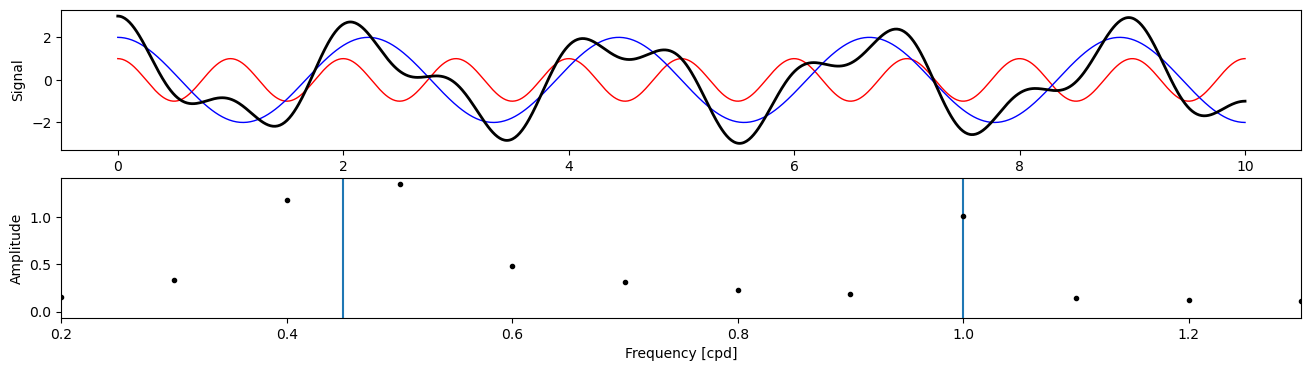

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(16, 4))

ax[0].plot(time, comp1, 'r', lw=1, label='Component 1')
ax[0].plot(time, comp2, 'b', lw=1, label='Component 2')
ax[0].plot(time, comp_sum, 'k', lw=2, label='Component 2')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Signal')

ax[1].axvline(0.45)
ax[1].axvline(1)
ax[1].plot(freq, amplitude, 'k.', label='Zeitdauer 10 Tage')
ax[1].set_xlim(0.2, 1.3)
ax[1].set_xlabel('Frequency [cpd]')
ax[1].set_ylabel('Amplitude')

plt.show()

<img src="https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/fundamentals-of-big-spatial-data/-/raw/main/figures/FFT_leck.png?ref_type=heads" alt="alt text" width="1300" align="left"/>

*Source: [Wikipedia](https://de.wikipedia.org/wiki/Leck-Effekt)*

**🧠 Dive Deeper:** [The Phenomenon of Leakage](https://jackschaedler.github.io/circles-sines-signals/dft_leakage.html)

The key points are:

1. Adjusting the data length in the time domain: By carefully choosing how long your signal is, you can minimize the mismatch at the signal boundaries that causes leakage.
2. Using a window function: A window function is used to smoothly shape or “taper” the signal edges so that the transition at the start and end of the data is less abrupt. This helps reduce the unwanted spreading (“leakage”) of signal energy into other frequency bins.

### 📖Windowing

- When you perform a Discrete Fourier Transform (DFT) on a time series, it inherently uses a rectangular window. 

- The rectangular window has the same length as the duration of your time series data. 

- Instead of a rectangular window, you can use different window functions. These alternative windows can be designed to meet specific goals or criteria.

- One common goal is to avoid sudden jumps or discontinuities at the edges of the windowed data, which can cause inaccuracies in frequency analysis.

The **Hanning window** (also known as the Hann window) is a popular alternative to the rectangular window. Its mathematical formula is:

$w(n) = \frac{1}{2} \left[ 1 + cos \left( \frac{2 \pi n}{M - 1} \right) \right]$ 

Where:
- $w(n)$: The weight applied to the $n$th data point
- $M$: The total number of data points

This window smoothly tapers the data at the beginning and end, reducing abrupt changes that can lead to the leakage effect.

<img src="https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/fundamentals-of-big-spatial-data/-/raw/main/figures/windowing.png?ref_type=heads" alt="alt text" width="1100" align="left"/>

In conclusion the following points should be considered:

- Applying a window function like the Hanning window can reduce the leakage effect (unwanted spreading of signal energy across frequencies) but cannot eliminate it entirely.
- Using a window alters the original signal. To get accurate frequency measurements, you need to compensate for this change. For instance, the Hanning window typically requires multiplying the amplitude by a factor of about 2 to correct for its effect.
- The choice of window should be tailored to your specific needs and the characteristics of your data. There are many different window functions available, each with its own strengths and weaknesses. 

**🧠 Dive Deeper** For more information, you can refer to the [Window Function Wikipedia page](https://en.wikipedia.org/wiki/Window_function).

Below, we will apply the Hanning window to the sea-level time series to demonstrate its effect on the frequency spectrum.

In [14]:
url = "https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/fundamentals-of-big-spatial-data/-/raw/main/Data/Lesson6_Palau_sea-level.csv"
sea_level = pd.read_csv(url, parse_dates=True, index_col='Datetime[GMT]', dayfirst=True)
sea_level

Sea level [mm]
Datetime[GMT]                      
2017-11-25 02:00:00            2124
2017-11-25 03:00:00            2127
2017-11-25 04:00:00            1997
2017-11-25 05:00:00            1886
2017-11-25 06:00:00            1734
...                             ...
2018-12-31 19:00:00            1566
2018-12-31 20:00:00            1496
2018-12-31 21:00:00            1372
2018-12-31 22:00:00            1218
2018-12-31 23:00:00            1062

[9646 rows x 1 columns]

In [15]:
# the rectangular window
N = len(sea_level)
T = 24

data_fft = np.fft.fft(sea_level['Sea level [mm]'])
data_fft = data_fft[0:int(N/2)]

freq = np.fft.fftfreq(N, d=1/T)
freq = freq[0:int(N/2)]

amp_rect = (2/N)*np.abs(data_fft)

In [16]:
# the Hanning window
N = len(sea_level)
T = 24

# generate the window
hanning_data = np.hanning(N)*sea_level['Sea level [mm]']

data_fft = np.fft.fft(hanning_data)
data_fft = data_fft[0:int(N/2)]

freq = np.fft.fftfreq(N, d=1/T)
freq = freq[0:int(N/2)]

amp_hann = 2*(2/N)*np.abs(data_fft)

(-10.0, 600.0)

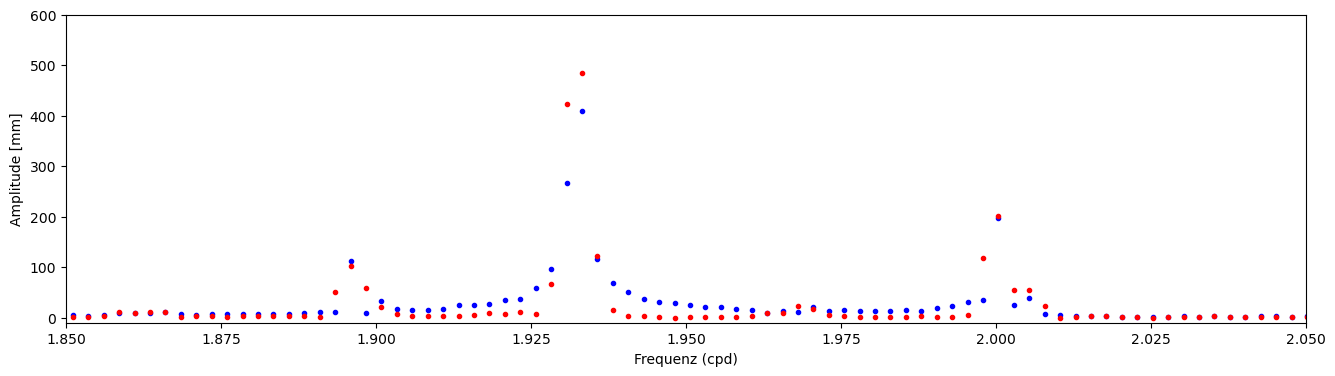

In [17]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(freq[1:], amp_rect[1:], 'b.', label='Rectangular window')
ax.plot(freq[1:], amp_hann[1:], 'r.', label='Hanning window')
ax.set_xlabel('Frequenz (cpd)')
ax.set_ylabel('Amplitude [mm]')
ax.set_xlim(1.85, 2.05)
ax.set_ylim(-10, 600)

### 📖Other Methods of Frequency Analysis

- Frequency analysis is a specialized area within signal processing that focuses on understanding the frequency components of signals.
- Due to its complexity and importance, frequency analysis often requires its own dedicated course or module to be properly understood and applied.
- The DFT is a widely used and well-established method for frequency analysis. It's popular because it effectively transforms time-domain data into its frequency components.

💡While DFT is popular, it's just one of many techniques available for frequency analysis. Newer methods exist that can offer advantages in certain situations, but they tend to be mathematically more complex and may require a deeper understanding to implement correctly.

### 📖Overall Summary

When analyzing the frequency components of a signal:

- Window Functions help manage issues like the leakage effect by shaping the data before transformation.
- Choosing the Right Window is crucial and depends on your specific application and data characteristics.
- DFT remains a foundational tool in frequency analysis, but exploring other methods can provide additional insights, especially as signal processing continues to evolve.
- If you're diving deeper into frequency analysis, consider studying various window functions and alternative transformation methods to find the best fit for your data and analysis goals.

### ✏️Task1

In an observation well labeled **BLM-1** in California's Death Valley, a time series of atmospheric pressure and groundwater level was measured. The data is provided in the file `data/Lesson6_BLM-1.csv`.

- Import the data and plot both time series.
- Do both datasets contain visible cyclic components?
- Compute the amplitude spectrum for both datasets.
- Identify the frequencies found and their origins.  

💡The spectrum must be limited to a specific frequency range.

> Source: The data is derived from the publication by [Rau et al. (2020)](https://hess.copernicus.org/articles/24/6033/2020/).